In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Define a ResNet block
def resnet_block(x, filters, conv_size):
    shortcut = x
    x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
    x = layers.BatchNormalization()(x)

    shortcut = layers.Conv2D(filters, conv_size, activation=None, padding='same')(shortcut)
    shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([shortcut, x])
    x = layers.Activation('relu')(x)

    return x

# Define the model
inputs = layers.Input(shape=(28, 28, 1))
x = resnet_block(inputs, 32, 3)
x = layers.MaxPooling2D(2)(x)
x = resnet_block(x, 64, 3)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 24s 9ms/step - loss: 0.1094 - accuracy: 0.9669 - val_loss: 0.0582 - val_accuracy: 0.9818
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0425 - accuracy: 0.9866 - val_loss: 0.0368 - val_accuracy: 0.9883
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0294 - val_accuracy: 0.9902
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0251 - accuracy: 0.9926 - val_loss: 0.0364 - val_accuracy: 0.9891
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0426 - val_accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0290 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0123 - accuracy: 0.9961 - val_loss: 0.0289 - va

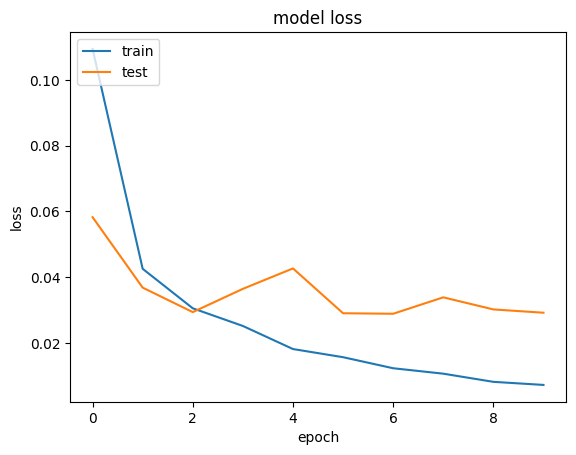

In [3]:
# show graphs
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [4]:
# using transfer learning on mnist dataset
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]